In [1]:
from libraries import *
from parameters import *
from numpy import asarray
from numpy import savetxt
from sklearn import linear_model

%matplotlib inline

/home/eraslab1/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.getcwd()
os.chdir(projectDir)

Reduce the anndata object to the selected effected genes and the cells with effective perturbations.

In [4]:
adata = sc.read('outputs/anndata/adata-hash-features_ALLKO_11152020_PerGENE.h5ad')
cGenes = pd.read_csv('ME_GeneModules_leiden_8_Modules.csv', header=0, index_col=0)


In [5]:
adata.shape

(320811, 6685)

In [6]:
flat_clist = cGenes.iloc[:,0]
deneme = pd.Series([ "0610012G03Rik",
                    "2010005H15Rik",
                    "2010111I01Rik",
                    "2310001H17Rik",
                    "2810474O19Rik",
                    "H2-Q7",
                    "H2-Q6",
                    "H2-DMa",
                    "H2-T23",
                    "H2-DMb1",
                    "H2-Ab1",
                    "H2-Aa",
                    "H2-Eb1", 
                    "H2-M2", 
                    "H2-K1",
                    "H2-D1"])
flat_clist = flat_clist.append(deneme)
flat_clist = flat_clist[flat_clist.isin(adata.var.index)]
flat_clist[~flat_clist.isin(adata.var.index)]

/tmp/ipykernel_13140/4085915290.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flat_clist = flat_clist.append(deneme)


Series([], dtype: object)

In [7]:
adataSub = adata[:, flat_clist].copy()
adataSub.X.shape

(320811, 1041)

In [8]:
rnaMat = adataSub.X
rnaMat = pd.DataFrame(rnaMat)
rnaMat.columns = adataSub.var_names
rnaMat.index = adataSub.obs_names


In [12]:
expMean = rnaMat.mean(axis=0)

In [31]:
df = adataSub.obs[["n_genes", "mt_frac", "leiden" ]]
dummies = pd.get_dummies(df.leiden)
df = df.join(dummies)
df.drop(["leiden"], axis=1,inplace = True) 

regr = linear_model.LinearRegression(fit_intercept = False) # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(df, rnaMat)
predicted = regr.predict(df)



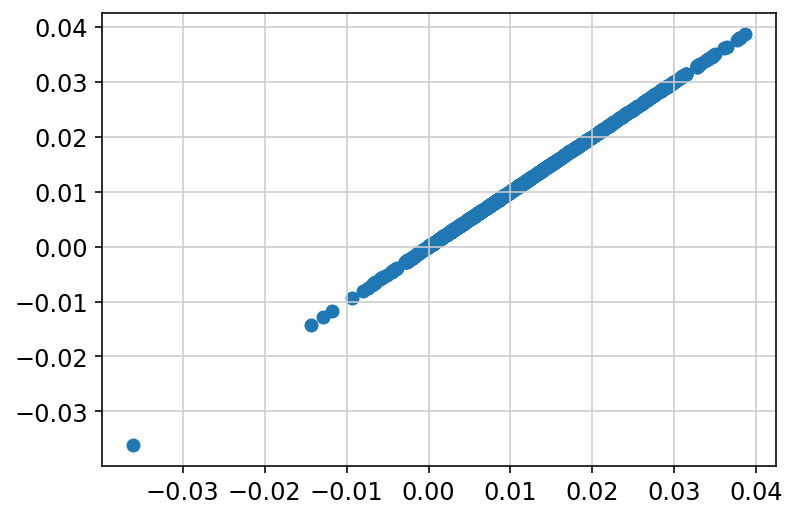

In [32]:
plt.scatter(expMean, predicted.mean(axis=0))
plt.show()

In [33]:
residuals = rnaMat-predicted


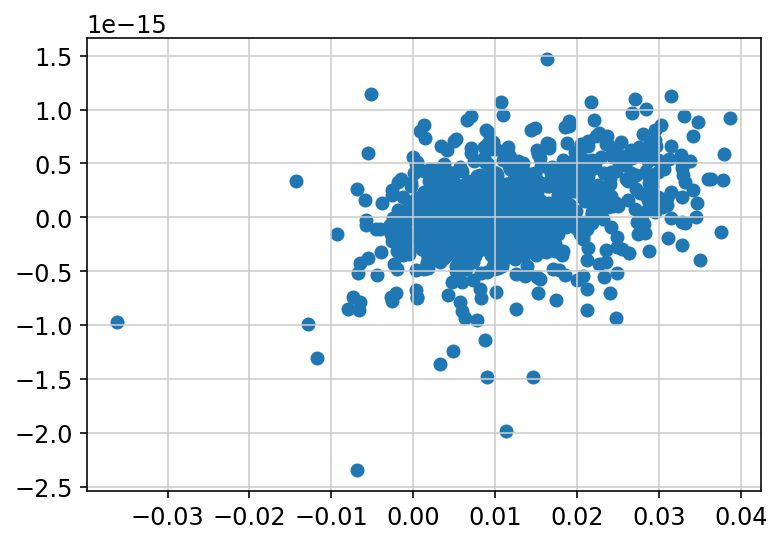

In [34]:
plt.scatter(expMean, residuals.mean(axis=0))
plt.show()

In [36]:
from scipy.stats import pearsonr,spearmanr

pearsonr(expMean, residuals.mean(axis=0))
#spearmanr(expMean, residuals.mean(axis=0))

(0.3458700560829808, 1.2769885269491105e-30)

In [ ]:

adataSub.layers["ClusterResiduals"] = residuals


In [8]:
covariates = adataSub.uns['feature_barcode_names_filtered_GENES']

In [9]:
fBarMat = adataSub.obs[covariates]
fBarMat.shape

(320811, 1033)

In [10]:
fBarMat

,GENE_4921501E09Rik_,GENE_4930595M18Rik_,GENE_8030462N17Rik_,GENE_Aamp_,GENE_Abtb1_,GENE_Abtb2_,GENE_Acaca_,GENE_Ago2_,GENE_Ahctf1_,GENE_Ahr_,...,GENE_Zfp651_,GENE_Zfp91_,GENE_Zmiz1_,GENE_Zmiz2_,GENE_Znrf2_,GENE_Znrf3_,GENE_Znrf4_,GENE_Zpbp2_,GENE_CONTROL_,GENE_INEFFECT_
AAACCCAGTGACACGA-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAAAGCAGTCTT-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAAAGCATTTGC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAATCTGGTGCG-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTCATCGGC-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGAGTCAAGTCTG-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGTTAGAATTCAG-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGTTTCAGACCGC-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fBarMat.sum(axis=1).value_counts()

1    242938
2     68137
3      9266
4       464
5         6
dtype: int64

In [12]:
# colgenenames = [x.split('_')[1] for x in fBarMat.columns]
# fBarMat.columns = colgenenames
# fBarMat

## Read guide modules

In [13]:
#guideModules = pd.read_csv("GuideModules_10__ClustersNotRegressed_.csv", index_col=0)
guideModules = pd.read_csv("/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_leiden_6_Modules.csv", index_col=0)
guideModules.index = "GENE_"+guideModules.GuideName+"_"
guideModules.GuideName = "GENE_"+guideModules.GuideName+"_"

In [14]:
#group_gene_list = guideModules.geneName.tolist() + ['CONTROL', 'INEFFECT']
group_gene_list = guideModules.GuideName.tolist() + ['GENE_CONTROL_']
nongroup_gene_list = fBarMat.columns[~fBarMat.columns.isin(group_gene_list)]

len(group_gene_list), len(nongroup_gene_list)

(330, 703)

## Select cells that are nonzero for group_gene_list and zero for non_group_list

In [15]:
fBarMat = fBarMat.loc[(fBarMat[group_gene_list].sum(1) > 0) & (fBarMat[nongroup_gene_list].sum(1) == 0)].copy()
fBarMat

,GENE_4921501E09Rik_,GENE_4930595M18Rik_,GENE_8030462N17Rik_,GENE_Aamp_,GENE_Abtb1_,GENE_Abtb2_,GENE_Acaca_,GENE_Ago2_,GENE_Ahctf1_,GENE_Ahr_,...,GENE_Zfp651_,GENE_Zfp91_,GENE_Zmiz1_,GENE_Zmiz2_,GENE_Znrf2_,GENE_Znrf3_,GENE_Znrf4_,GENE_Zpbp2_,GENE_CONTROL_,GENE_INEFFECT_
AAACGAAAGCAGTCTT-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTAGTTGTAGA-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
AAACGCTCAAAGACGC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTCAGTGTACT-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGATCTATTTCG-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTGTGTTCAGGCGATA-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTGTTCAGTCCGGATC-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCAGTTCTATCGGA-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
fBarMat.shape

(131361, 1033)

## Select only group_gene_list genes and discard the rest

In [17]:
fBarMat_grouped = fBarMat[group_gene_list].copy()
fBarMat_grouped

,GENE_Aamp_,GENE_Bop1_,GENE_Cirh1a_,GENE_Dcaf13_,GENE_Grb2_,GENE_Myc_,GENE_Nle1_,GENE_Nol10_,GENE_Pak1ip1_,GENE_Ptpn11_,...,GENE_Ube2i_,GENE_Ubr4_,GENE_Ubr5_,GENE_Vhl_,GENE_Wdr20_,GENE_Wdr26_,GENE_Wdr33_,GENE_Zbtb17_,GENE_Zbtb7b_,GENE_CONTROL_
AAACGAAAGCAGTCTT-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTAGTTGTAGA-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAACGCTCAAAGACGC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTCAGTGTACT-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGATCTATTTCG-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTGTGTTCAGGCGATA-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTGTTCAGTCCGGATC-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCAGTTCTATCGGA-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
fBarMat_grouped.sum(axis=1)

AAACGAAAGCAGTCTT-1-E3-1-0     1
AAACGAATCTCAACCC-1-E3-1-0     1
AAACGCTAGTTGTAGA-1-E3-1-0     1
AAACGCTCAAAGACGC-1-E3-1-0     1
AAACGCTCAGTGTACT-1-E3-1-0     1
                             ..
TTGTGGATCTATTTCG-1-E4-24-1    2
TTGTGTTCAGGCGATA-1-E4-24-1    2
TTGTTCAGTCCGGATC-1-E4-24-1    2
TTTCAGTTCTATCGGA-1-E4-24-1    2
TTTGACTCAGATCCAT-1-E4-24-1    2
Length: 131361, dtype: int64

In [19]:
fBarMat_groupedSingles = fBarMat_grouped.loc[fBarMat_grouped.sum(axis=1) == 1,:].T.copy()

In [20]:
fBarMat_groupedDoubles = fBarMat_grouped.loc[fBarMat_grouped.sum(axis=1) == 2,:].T.copy()

In [21]:
fBarMat_groupedDoubles.sum(axis=0)

AAACCCACAGCACAGA-1-E3-1-1     2
AACAACCCAATGAACA-1-E3-1-1     2
AACCAACAGTTGTAAG-1-E3-1-1     2
AACCTGACACCCAAGC-1-E3-1-1     2
AACCTGACATAAGATG-1-E3-1-1     2
                             ..
TTGTGGATCTATTTCG-1-E4-24-1    2
TTGTGTTCAGGCGATA-1-E4-24-1    2
TTGTTCAGTCCGGATC-1-E4-24-1    2
TTTCAGTTCTATCGGA-1-E4-24-1    2
TTTGACTCAGATCCAT-1-E4-24-1    2
Length: 10244, dtype: int64

In [22]:
guideModules.GuideGroup = guideModules.GuideGroup.astype(str)
guideModules

,GuideName,GuideGroup,GuideColor
GuideName,,,
GENE_Aamp_,GENE_Aamp_,4,#aa40fc
GENE_Bop1_,GENE_Bop1_,4,#aa40fc
GENE_Cirh1a_,GENE_Cirh1a_,4,#aa40fc
GENE_Dcaf13_,GENE_Dcaf13_,4,#aa40fc
GENE_Grb2_,GENE_Grb2_,4,#aa40fc
...,...,...,...
GENE_Wdr20_,GENE_Wdr20_,2,#279e68
GENE_Wdr26_,GENE_Wdr26_,2,#279e68
GENE_Wdr33_,GENE_Wdr33_,2,#279e68


In [23]:
fBarMat_grouped

,GENE_Aamp_,GENE_Bop1_,GENE_Cirh1a_,GENE_Dcaf13_,GENE_Grb2_,GENE_Myc_,GENE_Nle1_,GENE_Nol10_,GENE_Pak1ip1_,GENE_Ptpn11_,...,GENE_Ube2i_,GENE_Ubr4_,GENE_Ubr5_,GENE_Vhl_,GENE_Wdr20_,GENE_Wdr26_,GENE_Wdr33_,GENE_Zbtb17_,GENE_Zbtb7b_,GENE_CONTROL_
AAACGAAAGCAGTCTT-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTAGTTGTAGA-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAACGCTCAAAGACGC-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTCAGTGTACT-1-E3-1-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGATCTATTTCG-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTGTGTTCAGGCGATA-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTGTTCAGTCCGGATC-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCAGTTCTATCGGA-1-E4-24-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#fBarMat_grouped = pd.concat([fBarMat_grouped.loc[~fBarMat_grouped.index.isin(['CONTROL', 'INEFFECT'])].groupby(guideModules.TargetGroup).sum()>0, 
#                             fBarMat_grouped.loc[['CONTROL', 'INEFFECT']]], axis=0).T
groupedSingles = pd.concat([fBarMat_groupedSingles.loc[~fBarMat_groupedSingles.index.isin(['GENE_CONTROL_'])].groupby(guideModules.GuideGroup).sum()>0, 
                             fBarMat_groupedSingles.loc[['GENE_CONTROL_']]], axis=0).T
groupedSingles["Doubles"] = 0
groupedSingles["DoubleSameGroup"] = 0
groupedSingles

,0,1,2,3,4,5,GENE_CONTROL_,Doubles,DoubleSameGroup
AAACGAAAGCAGTCTT-1-E3-1-0,0,1,0,0,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,0,1,0,0,0,0,0
AAACGCTAGTTGTAGA-1-E3-1-0,0,0,0,0,0,0,1,0,0
AAACGCTCAAAGACGC-1-E3-1-0,1,0,0,0,0,0,0,0,0
AAACGCTCAGTGTACT-1-E3-1-0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
TTTGGTTCACCTGATA-1-E4-24-0,0,0,1,0,0,0,0,0,0
TTTGGTTCAGATCACT-1-E4-24-0,0,0,0,1,0,0,0,0,0
TTTGGTTGTCATCACA-1-E4-24-0,0,0,0,1,0,0,0,0,0
TTTGTTGAGTCATCCA-1-E4-24-0,1,0,0,0,0,0,0,0,0


In [25]:
doublesSameGroup = pd.concat([fBarMat_groupedDoubles.loc[~fBarMat_groupedDoubles.index.isin(['GENE_CONTROL_'])].groupby(guideModules.GuideGroup).sum()>1, 
                             fBarMat_groupedDoubles.loc[['GENE_CONTROL_']]], axis=0).T

doublesSameGroup = doublesSameGroup.loc[doublesSameGroup.sum(axis=1) == 1,:]
#doublesSameGroup[doublesSameGroup == 1] = 2
doublesSameGroup["Doubles"] = 1
doublesSameGroup["DoubleSameGroup"] = 1
doublesSameGroup

,0,1,2,3,4,5,GENE_CONTROL_,Doubles,DoubleSameGroup
AAACCCACAGCACAGA-1-E3-1-1,1,0,0,0,0,0,0,1,1
AAGCGTTAGTACAGCG-1-E3-1-1,0,0,1,0,0,0,0,1,1
ACCAAACAGTCCTGCG-1-E3-1-1,1,0,0,0,0,0,0,1,1
AGAGCCCAGTTCATCG-1-E3-1-1,0,0,0,0,1,0,0,1,1
AGGAATAGTTCCCAAA-1-E3-1-1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
TTAATCCTCATGCAGT-1-E4-24-1,1,0,0,0,0,0,0,1,1
TTGGTTTAGGAGGTTC-1-E4-24-1,1,0,0,0,0,0,0,1,1
TTGTTCAGTCCGGATC-1-E4-24-1,0,0,1,0,0,0,0,1,1
TTTCAGTTCTATCGGA-1-E4-24-1,0,1,0,0,0,0,0,1,1


In [26]:
doublesDifferentGroup = pd.concat([fBarMat_groupedDoubles.loc[~fBarMat_groupedDoubles.index.isin(['GENE_CONTROL_'])].groupby(guideModules.GuideGroup).sum()==1, 
                             fBarMat_groupedDoubles.loc[['GENE_CONTROL_']]], axis=0).T
doublesDifferentGroup = doublesDifferentGroup.loc[doublesDifferentGroup.sum(axis=1) == 2,:]
doublesDifferentGroup["Doubles"] = 1
doublesDifferentGroup["DoubleSameGroup"] = 0
doublesDifferentGroup

,0,1,2,3,4,5,GENE_CONTROL_,Doubles,DoubleSameGroup
AACAACCCAATGAACA-1-E3-1-1,0,1,1,0,0,0,0,1,0
AACCAACAGTTGTAAG-1-E3-1-1,1,0,0,1,0,0,0,1,0
AACCTGACACCCAAGC-1-E3-1-1,0,0,1,0,0,1,0,1,0
AACCTGACATAAGATG-1-E3-1-1,0,0,1,1,0,0,0,1,0
AAGAACACACAGTCCG-1-E3-1-1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
TTCGATTTCATAGACC-1-E4-24-1,0,1,1,0,0,0,0,1,0
TTGAGTGTCCTACGGG-1-E4-24-1,1,0,0,1,0,0,0,1,0
TTGGGATCAAGTATCC-1-E4-24-1,0,0,1,0,0,1,0,1,0
TTGTGGATCTATTTCG-1-E4-24-1,1,0,1,0,0,0,0,1,0


In [28]:
finalGroups = pd.concat([groupedSingles, doublesDifferentGroup, doublesSameGroup])
finalGroups.columns = ["K_0","K_1", "K_2", "K_3", "K_4", "K_5", "K_CONTROL","Doubles","DoubleSameGroup"]
finalGroups

,K_0,K_1,K_2,K_3,K_4,K_5,K_CONTROL,Doubles,DoubleSameGroup
AAACGAAAGCAGTCTT-1-E3-1-0,0,1,0,0,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,0,1,0,0,0,0,0
AAACGCTAGTTGTAGA-1-E3-1-0,0,0,0,0,0,0,1,0,0
AAACGCTCAAAGACGC-1-E3-1-0,1,0,0,0,0,0,0,0,0
AAACGCTCAGTGTACT-1-E3-1-0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
TTAATCCTCATGCAGT-1-E4-24-1,1,0,0,0,0,0,0,1,1
TTGGTTTAGGAGGTTC-1-E4-24-1,1,0,0,0,0,0,0,1,1
TTGTTCAGTCCGGATC-1-E4-24-1,0,0,1,0,0,0,0,1,1
TTTCAGTTCTATCGGA-1-E4-24-1,0,1,0,0,0,0,0,1,1


In [29]:
adataSubAllSelected = adataSub[finalGroups.index,:].copy()
adataSubAllSelected.obs = adataSubAllSelected.obs.join(finalGroups)
adataSubAllSelected.write('outputs/anndata/adata-hash-features_ALLKO_ForSCVI_09072021.h5ad')
finalGroups.to_csv('outputs/anndata/fBarMat_grouped_ALLKO_forSCVI.csv')
adataSubAllSelected.X.shape

(130830, 1041)

In [30]:
adataSub2 = adataSub[groupedSingles.index,:].copy()
groupedSingles.columns = ["K_0","K_1", "K_2", "K_3", "K_4", "K_5", "K_CONTROL","Doubles","DoubleSameGroup"]
adataSub2.obs = adataSub2.obs.join(groupedSingles)
adataSub2.write('outputs/anndata/adata-hash-features_SingleKO_ForSCVI_09072021.h5ad')
groupedSingles.to_csv('outputs/anndata/fBarMat_groupedSingleKOCells_forSCVI.csv')
adataSub2.X.shape

(120586, 1041)

In [ ]:
#fBarMat_grouped.to_csv("NumCells_334_TargetGenes.csv", header=("Group_"+fBarMat_grouped.columns))

In [ ]:
# fBarMat_groupedSingle = fBarMat_grouped[fBarMat_grouped.columns[1:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# fBarMat_encodedDF = pd.Series(label_encoder.fit_transform(fBarMat_groupedSingle))
# fBarMat_encodedDF.index = fBarMat_groupedSingle.index
# classFreq = fBarMat_encodedDF.value_counts()
# availGroups = classFreq[classFreq>100].index
# fBarMat_encodedDF = fBarMat_encodedDF[fBarMat_encodedDF.isin(availGroups)]
# latentCellsSubset = latentCells.loc[fBarMat_encodedDF.index,:]

# X = StandardScaler().fit_transform(latentCellsSubset)
# X_train, X_test, y_train, y_test = train_test_split(X, np.array(fBarMat_encodedDF), test_size=.2)


In [ ]:
# # binary encode
# from sklearn.preprocessing import OneHotEncoder
# fBarMat_encodedDF = np.array(fBarMat_encodedDF)
# onehot_encoder = OneHotEncoder(sparse=False)
# fBarMat_encodedDF = fBarMat_encodedDF.reshape(len(fBarMat_encodedDF), 1)
# onehot_encoded = onehot_encoder.fit_transform(fBarMat_encodedDF)

In [ ]:
# onehot_encoded.shape

In [ ]:
# fBarMat_groupedDoubleKOCells = fBarMat_grouped.loc[fBarMat_grouped.sum(1)==2,:]
# adataSubDoubleKO = adataSub[fBarMat_groupedDoubleKOCells.index,:].copy()
# fBarMat_groupedDoubleKOCells.columns = ["G_1", "G_10", "G_2", "G_3", "G_4", "G_5", "G_6", "G_7", "G_8", "G_9", "G_CONTROL"]
# adataSubDoubleKO.obs = adataSubDoubleKO.obs.join(fBarMat_groupedDoubleKOCells)
# adataSubDoubleKO.write('outputs/anndata/adata-hash-features_DoubleKO_ForSCVI_05012020.h5ad')